# SUPPORT VECTOR MACHINE FROM SCRATCH

## Introduction

Support Vector Machines (SVM) are powerful supervised learning algorithms used for classification and regression tasks. They work by finding the optimal boundary that best separates different classes in the feature space.

In this notebook, we will build an SVM intuition **from scratch** using a small, synthetic dataset. We will not use any machine learning libraries for modeling. Instead, we will focus on understanding the **geometry** behind SVM.

The main goal is to:
- Visualize the dataset and class separation
- Find the closest points from opposite classes
- Use these points to define the **decision boundary** and **margins**

This hands-on approach helps explain how SVM identifies the most important data points — the **support vectors** — to construct the widest possible margin between classes.

## Visualizing the Dataset

In this notebook, we explore a simple dataset with two features (`x1`, `x2`) and two classes labeled as `"Red"` and `"Blue"`.

The scatter plot below shows the separation between the two classes. Each point represents a sample, and the color indicates its class label.

This visualization helps us understand if the classes are linearly separable, which is important for training a Support Vector Machine (SVM) model.

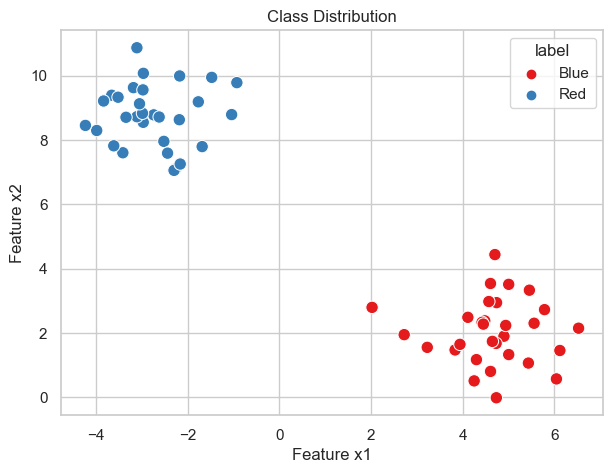

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")


sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="Set1", s=80)
plt.title("Class Distribution")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.show()

## Calculating Euclidean Distances

or each Blue point, we compute its distance to all Red points. Each distance is saved as a separate row in a new DataFrame called `distance_df`.

These distances will help us identify the closest points between the two classes, which are essential for constructing the SVM margin and decision boundary. 

In [2]:
records = []

blue_points = df[df["label"] == "Blue"].reset_index(drop=True)
red_points = df[df["label"] == "Red"].reset_index(drop=True)

for i, b in blue_points.iterrows():
    blue_id = f"Blue_{i+1}"
    for j, r in red_points.iterrows():
        red_id = f"Red_{j+1}"
        distance = np.sqrt((b["x1"] - r["x1"])**2 + (b["x2"] - r["x2"])**2)
        records.append({
            "blue_id": blue_id,
            "red_id": red_id,
            "blue_x1": b["x1"],
            "blue_x2": b["x2"],
            "red_x1": r["x1"],
            "red_x2": r["x2"],
            "distance": distance
        })

distance_df = pd.DataFrame(records)
distance_df

,blue_id,red_id,blue_x1,blue_x2,red_x1,red_x2,distance
0,Blue_1,Red_1,6.117773,1.454899,-3.110904,10.866564,13.181347
1,Blue_1,Red_2,6.117773,1.454899,-3.417222,7.601982,11.344723
2,Blue_1,Red_3,6.117773,1.454899,-3.987720,8.294442,12.202472
3,Blue_1,Red_4,6.117773,1.454899,-2.972615,8.548556,11.530617
4,Blue_1,Red_5,6.117773,1.454899,-2.522695,7.956575,10.813393
...,...,...,...,...,...,...,...
895,Blue_30,Red_26,4.644992,1.738583,-1.043549,8.788510,9.058751
896,Blue_30,Red_27,4.644992,1.738583,-1.686653,7.793442,8.760768
897,Blue_30,Red_28,4.644992,1.738583,-3.053580,9.125209,10.669127
898,Blue_30,Red_29,4.644992,1.738583,-2.969836,10.071408,11.288118


## Finding the Closest Pair

From the distance table, we select the pair of points (one from each class) that are the closest to each other.

This pair of points will define the **support vectors** in a hard-margin SVM and will be used to calculate the decision boundary and margins.

In [3]:
min_distance_row = distance_df.loc[distance_df["distance"].idxmin()]
min_distance_row

blue_id      Blue_26
red_id        Red_11
blue_x1     2.020134
blue_x2     2.795072
red_x1     -2.300334
red_x2      7.054616
distance    6.067137
Name: 760, dtype: object

## Visualizing the Closest Pair

We now highlight the closest Blue and Red points on the scatter plot.

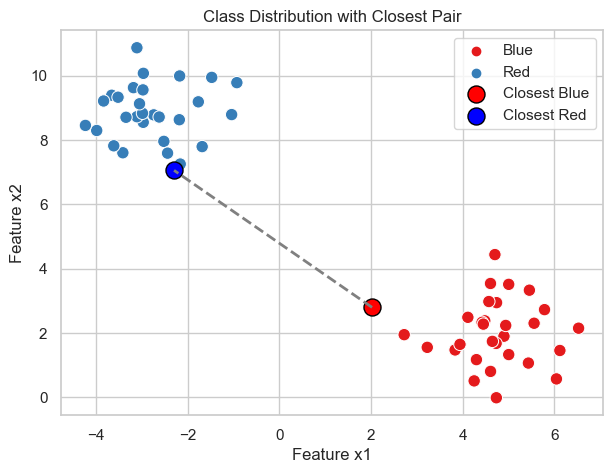

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="Set1", s=80)

# Highlight the closest blue-red pair
plt.scatter(min_distance_row["blue_x1"], min_distance_row["blue_x2"], 
            color="red", edgecolor="black", s=150, marker="o", label="Closest Blue")

plt.scatter(min_distance_row["red_x1"], min_distance_row["red_x2"], 
            color="blue", edgecolor="black", s=150, marker="o", label="Closest Red")

# Draw line between them
plt.plot([min_distance_row["blue_x1"], min_distance_row["red_x1"]],
         [min_distance_row["blue_x2"], min_distance_row["red_x2"]],
         color="gray", linestyle="--", linewidth=2)

plt.title("Class Distribution with Closest Pair")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

## Computing and Marking the Midpoint

After identifying the closest Blue and Red points, we calculate the **midpoint** between them.

This midpoint is the center of the margin in a hard-margin SVM and lies exactly halfway between the two support vectors.

This point will serve as the center of the decision boundary in the next steps.

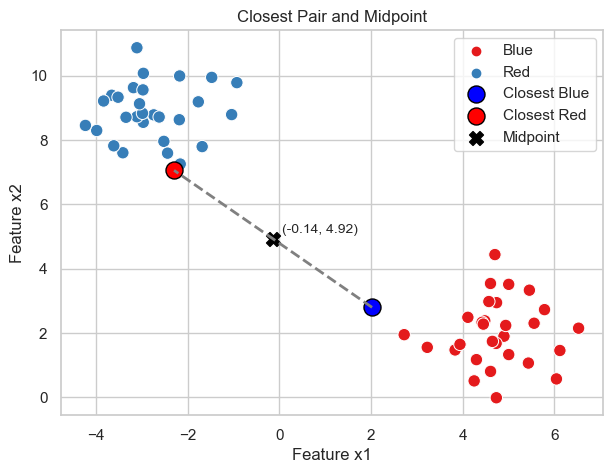

In [5]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="Set1", s=80)

x1_blue, x2_blue = min_distance_row["blue_x1"], min_distance_row["blue_x2"]
x1_red, x2_red = min_distance_row["red_x1"], min_distance_row["red_x2"]

mid_x = (x1_blue + x1_red) / 2
mid_y = (x2_blue + x2_red) / 2

plt.scatter(x1_blue, x2_blue, color="blue", edgecolor="black", s=150, label="Closest Blue")
plt.scatter(x1_red, x2_red, color="red", edgecolor="black", s=150, label="Closest Red")
plt.plot([x1_blue, x1_red], [x2_blue, x2_red], color="gray", linestyle="--", linewidth=2)
plt.scatter(mid_x, mid_y, color="black", s=100, marker="X", label="Midpoint")
plt.text(mid_x + 0.2, mid_y + 0.2, f"({mid_x:.2f}, {mid_y:.2f})", fontsize=10)

plt.title("Closest Pair and Midpoint")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

## Drawing the SVM Decision Boundary and Margins

To simulate how a Support Vector Machine works, we now draw three important lines:

- **Decision Boundary**: This line goes through the midpoint between the two closest points and is perpendicular to the line connecting them.
- **Margins**: These two lines are parallel to the decision boundary and pass through the closest points from each class (support vectors).

We compute a normal vector by rotating the line between the support vectors. Then we normalize it and use it to define the slope and direction of the margins and boundary.

In the plot:
- The decision boundary is shown as a dashed black line
- The margins are shown as dotted lines, one red and one blue
- The closest points and the midpoint are also marked

This visualization shows how an SVM separates classes with the maximum possible margin.

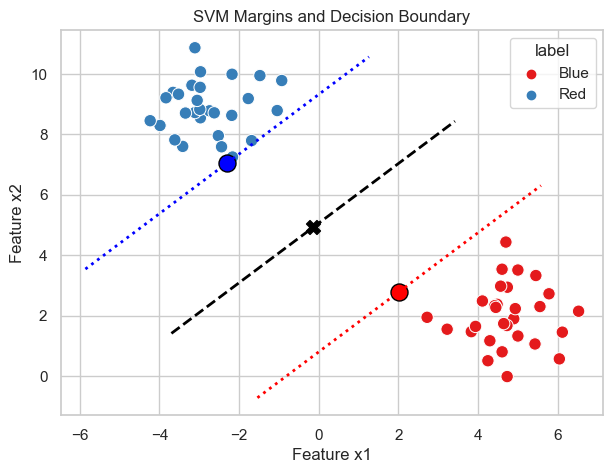

In [6]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="Set1", s=80)

x1_blue, x2_blue = min_distance_row["blue_x1"], min_distance_row["blue_x2"]
x1_red, x2_red = min_distance_row["red_x1"], min_distance_row["red_x2"]

mid_x = (x1_blue + x1_red) / 2
mid_y = (x2_blue + x2_red) / 2

vec_x = x2_red - x2_blue
vec_y = -(x1_red - x1_blue)

norm = (vec_x**2 + vec_y**2) ** 0.5
vec_x /= norm
vec_y /= norm

length = 5

def draw_margin(x0, y0, vec_y, vec_x, style, color, label=None):
    x_vals = np.array([x0 - vec_y * length, x0 + vec_y * length])
    y_vals = np.array([y0 - vec_x * length, y0 + vec_x * length])
    plt.plot(x_vals, y_vals, style, color=color, linewidth=2, label=label)

plt.scatter(x1_blue, x2_blue, color="red", edgecolor="black", s=150, label="Closest Blue")
plt.scatter(x1_red, x2_red, color="blue", edgecolor="black", s=150, label="Closest Red")
plt.scatter(mid_x, mid_y, color="black", s=100, marker="X", label="Midpoint")

draw_margin(mid_x, mid_y, vec_y, vec_x, "--", "black", label="Decision Boundary")
draw_margin(x1_blue, x2_blue, vec_y, vec_x, ":", "red", label="Margin (Blue)")
draw_margin(x1_red, x2_red, vec_y, vec_x, ":", "blue", label="Margin (Red)")

plt.title("SVM Margins and Decision Boundary")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.show()


## Conclusion

In this notebook, we built an intuitive understanding of how a hard-margin Support Vector Machine (SVM) works using a small, linearly separable dataset.

We followed these steps:

- Visualized the distribution of two classes in 2D space
- Calculated all pairwise distances between opposite-class points
- Identified the closest pair, which would act as support vectors
- Computed the midpoint and constructed the decision boundary
- Drew margin lines parallel to the boundary, passing through the support vectors

This geometric interpretation demonstrates the key principle of SVM: **finding the optimal separating hyperplane that maximizes the margin** between classes.

Such a step-by-step visual approach provides a solid foundation for understanding more advanced SVM concepts, such as soft margins and kernel tricks.